In [102]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# import sys
# !{sys.executable} -m pip install kmodes
from kmodes.kmodes import KModes



In [103]:
conn = psycopg2.connect(database = "dsa3101", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "t0220514e",
                        port = 5433)

## Tables

In [104]:
# get daily_sales table

cur = conn.cursor()
cur.execute('SELECT * FROM daily_sales;')
rows = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
daily_sales = pd.DataFrame(rows, columns=column_names)
daily_sales

,transaction_id,date,product_id,quantity
0,1601,2018-03-21,B014I8SX4Y,1
1,2872,2022-11-27,B014I8SSD0,1
2,4832,2018-04-12,B06XR9PR5X,1
3,5496,2020-12-24,B015OW3M1W,1
4,7115,2019-08-24,B006LW0WDQ,1
...,...,...,...,...
882,1847559,2022-01-09,B003L62T7W,1
883,1849170,2021-02-02,B014I8SSD0,1
884,1849692,2022-03-17,B015OW3M1W,1
885,1850677,2018-10-11,B01J8S6X2I,1


In [105]:
# get products table

cur.execute('SELECT * FROM products;')
rows = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
products = pd.DataFrame(rows, columns=column_names)
products

,product_id,product_name,about_product,category,actual_price,discounted_price,discount_percentage
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility : Compatible With iPhone 12...,Computers&Accessories|Accessories&Peripherals|...,13.19,4.79,0.64
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be...",Computers&Accessories|Accessories&Peripherals|...,4.19,2.39,0.43
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,【 Fast Charger& Data Sync】-With built-in safet...,Computers&Accessories|Accessories&Peripherals|...,22.79,2.39,0.90
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,The boAt Deuce USB 300 2 in 1 cable is compati...,Computers&Accessories|Accessories&Peripherals|...,8.39,3.95,0.53
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Computers&Accessories|Accessories&Peripherals|...,4.79,1.85,0.61
...,...,...,...,...,...,...,...
1346,B00TI8E7BI,Philips HD9306/06 1.5-Litre Electric Kettle (M...,"Food grade stainless steel, Frequency: 50 Hz. ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,32.34,32.34,0.00
1347,B07J9KXQCC,"Libra Room Heater for Home, Room Heaters Home ...","Libra room heater for home has cool, warm or h...","Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",27.59,11.39,0.59
1348,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Versatile, Protects Your Clothes: MoveCatcher ...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",11.99,2.39,0.80
1349,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,11.03,4.55,0.59


In [106]:
# get ratings table

cur.execute('SELECT * FROM ratings;')
rows = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
ratings = pd.DataFrame(rows, columns=column_names)
ratings

,product_id,average_rating,review_title,review_content,rating_count
0,B002PD61Y4,4.1,"good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,16262
1,B002SZEOLG,4.2,Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,179692
2,B003B00484,4.3,"Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",27201
3,B003L62T7W,4.3,"Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",31534
4,B004IO5BMQ,4.5,"Good silent mouse,Too small to hold!,Reviewing...",It's little small for big hands. But best avai...,54405
...,...,...,...,...,...
1346,B0BPCJM7TB,4.0,"Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,43
1347,B0BPJBTB3F,2.0,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2
1348,B0BQ3K23Y1,4.8,"Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",28
1349,B0BQRJ3C47,5.0,Awesome Product,Quick delivery.Awesome ProductPacking was good...,0


In [107]:
# get user_behaviour table

cur.execute('SELECT * FROM user_behaviour;')
rows = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
user_behaviour = pd.DataFrame(rows, columns=column_names)
user_behaviour

,user_id,timestamp,purchase_Frequency,purchase_Categories,personalized_Recommendation_Success,browsing_Frequency,product_Search_Method,search_Result_Exploration,customer_Reviews_Importance,add_to_Cart_Browsing,...,saveforlater_Frequency,review_Left,review_Reliability,review_Helpfulness,recommendation_Helpfulness,personalized_Recommendation_Frequency,rating_Accuracy,shopping_Satisfaction,service_Appreciation,improvement_Areas
0,1,2023-06-04 13:28:19,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,Yes,2,1,1,Competitive prices,Reducing packaging waste
1,2,2023-06-04 14:30:44,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,Sometimes,2,3,2,Wide product selection,Reducing packaging waste
2,3,2023-06-04 17:04:56,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,No,4,3,3,Competitive prices,Product quality and accuracy
3,4,2023-06-04 17:13:00,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,Sometimes,3,3,4,Competitive prices,Product quality and accuracy
4,5,2023-06-04 17:28:06,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,Yes,4,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2023-06-12 16:02:02,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,Sometimes,3,3,4,Competitive prices,Customer service responsiveness
598,599,2023-06-12 16:02:53,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,Sometimes,3,3,3,Product recommendations,Reducing packaging waste
599,600,2023-06-12 16:03:59,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,Sometimes,3,2,3,Wide product selection,Product quality and accuracy
600,601,2023-06-12 21:57:20,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,Yes,2,2,2,Wide product selection,Product quality and accuracy


In [108]:
# get users table

cur.execute('SELECT * FROM users;')
rows = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
users = pd.DataFrame(rows, columns=column_names)
users

,user_id,age,gender
0,1,23,Female
1,2,23,Female
2,3,24,Prefer not to say
3,4,24,Female
4,5,22,Female
...,...,...,...
597,598,23,Female
598,599,23,Female
599,600,23,Female
600,601,23,Female


## Part 1: Analyze historical sales data

### EDA

In [109]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  887 non-null    int64 
 1   date            887 non-null    object
 2   product_id      887 non-null    object
 3   quantity        887 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 27.8+ KB


In [110]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1351 non-null   object
 1   product_name         1351 non-null   object
 2   about_product        1351 non-null   object
 3   category             1351 non-null   object
 4   actual_price         1351 non-null   object
 5   discounted_price     1351 non-null   object
 6   discount_percentage  1351 non-null   object
dtypes: object(7)
memory usage: 74.0+ KB


In [111]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1351 non-null   object 
 1   average_rating  1351 non-null   float64
 2   review_title    1351 non-null   object 
 3   review_content  1351 non-null   object 
 4   rating_count    1351 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 52.9+ KB


In [117]:
# # Reduce number of product categories
# new_products = products.copy()
# new_products['overall_category'] = new_products['category'].apply(lambda x: x.split("|")[0] if "|" in x else x)
# new_products['overall_category'].value_counts()

In [119]:
# Join daily_sales and products on product_id

new_daily_sales = daily_sales.copy()
new_ratings = ratings.copy()
new_products = products.copy()
new_daily_sales = new_daily_sales.merge(new_products[['product_id', 'product_name', 'about_product', 'category', 'actual_price', 'discounted_price', 'discount_percentage']], on='product_id', how='left')
new_daily_sales = new_daily_sales.merge(new_ratings[['product_id', 'average_rating', 'review_title', 'review_content', 'rating_count']], on='product_id', how='left')
new_daily_sales.head()

,transaction_id,date,product_id,quantity,product_name,about_product,category,actual_price,discounted_price,discount_percentage,average_rating,review_title,review_content,rating_count
0,1601,2018-03-21,B014I8SX4Y,1,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",HDMI A Male to A Male Cable: Supports Ethernet...,"Electronics|HomeTheater,TV&Video|Accessories|C...",16.80,3.71,0.78,4.4,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
1,2872,2022-11-27,B014I8SSD0,1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",Please select appropriate display resolution &...,"Electronics|HomeTheater,TV&Video|Accessories|C...",5.70,3.71,0.35,4.4,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
2,4832,2018-04-12,B06XR9PR5X,1,"Amazon Basics HDMI Coupler,Black",Note: Product only works as an extender adapte...,Electronics|HomeAudio|Accessories|Adapters,7.20,2.51,0.65,4.4,"Good Quality Product,Good Product,Good,Perfect...","Working as expected,Good product, Perfectly wo...",18872
3,5496,2020-12-24,B015OW3M1W,1,AmazonBasics 6-Feet DisplayPort (not USB port)...,DisplayPort male to HDMI male cable allows you...,"Electronics|HomeTheater,TV&Video|Accessories|C...",20.40,9.59,0.53,4.1,"Worth Buying,Good one!!,Very nice seller servi...",It's really worth it . I am using it to get ou...,28638
4,7115,2019-08-24,B006LW0WDQ,1,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,50 Feet of 16-gauge speaker wire|Connects audi...,"Electronics|HomeTheater,TV&Video|Accessories|C...",9.54,4.79,0.50,4.4,"Good,Good Quality,Amazing,Wire cost,Quality an...","Good Packaging.. Wire Quality is Good.,Very go...",12091


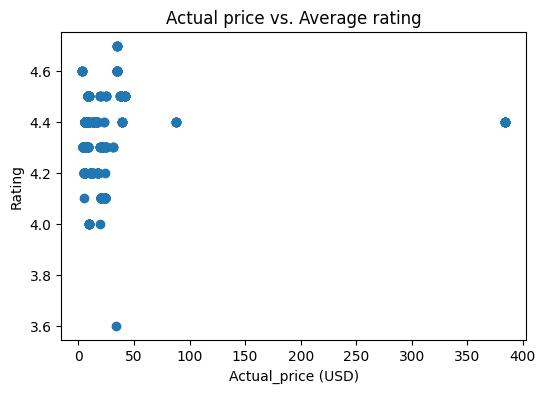

In [130]:
plt.figure(figsize=(6, 4))
plt.scatter(new_daily_sales['actual_price'], new_daily_sales['average_rating'])
plt.xlabel('Actual_price (USD)')
plt.ylabel('Rating')
plt.title("Actual price vs. Average rating")
plt.show()

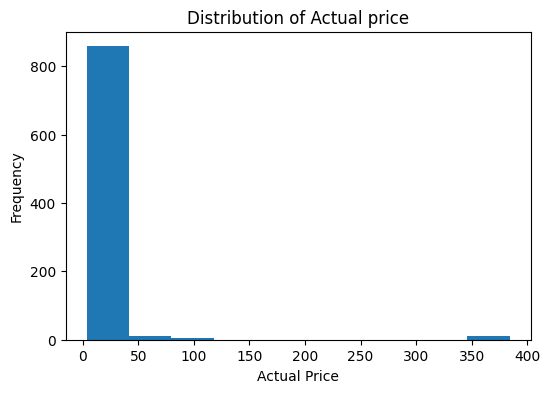

In [131]:
plt.figure(figsize=(6, 4))
plt.hist(new_daily_sales['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual price')
plt.show()

In [134]:
cols = encoded_daily_sales.info()

cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   transaction_id       887 non-null    int64
 1   product_id           887 non-null    int64
 2   quantity             887 non-null    int64
 3   product_name         887 non-null    int64
 4   about_product        887 non-null    int64
 5   category             887 non-null    int64
 6   actual_price         887 non-null    int64
 7   discounted_price     887 non-null    int64
 8   discount_percentage  887 non-null    int64
 9   average_rating       887 non-null    int64
 10  review_title         887 non-null    int64
 11  review_content       887 non-null    int64
 12  rating_count         887 non-null    int64
dtypes: int64(13)
memory usage: 90.2 KB


In [125]:
le = LabelEncoder()
encoded_daily_sales = new_daily_sales.copy()
encoded_daily_sales = encoded_daily_sales.drop(columns='date')
cols = encoded_daily_sales.columns

for col in cols:
    encoded_daily_sales[col] = le.fit_transform(encoded_daily_sales[col])
encoded_daily_sales.head()

,transaction_id,product_id,quantity,product_name,about_product,category,actual_price,discounted_price,discount_percentage,average_rating,review_title,review_content,rating_count
0,0,16,0,2,30,16,25,12,37,5,33,14,53
1,1,15,0,3,45,16,4,12,8,5,33,14,53
2,2,26,0,1,39,15,9,3,30,5,20,52,19
3,3,17,0,12,23,16,30,26,20,2,51,27,27
4,4,4,0,0,5,19,15,15,17,5,27,7,14


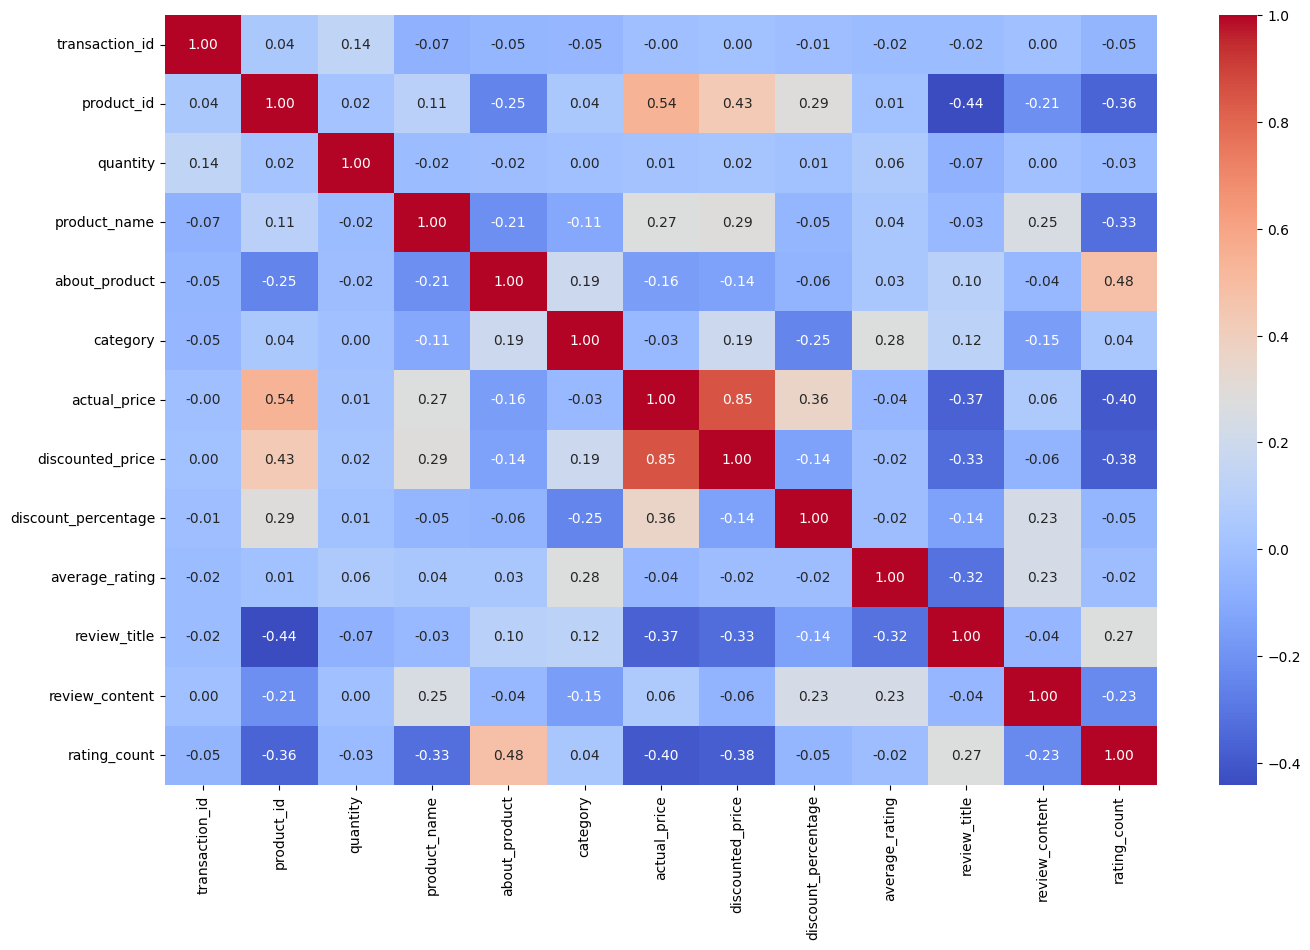

In [124]:
correlation_matrix = encoded_daily_sales.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Discount price and discount percentage has a relatively high correlation of 0.85.

## Part 2: Analyse purchasing behaviour

### EDA

In [10]:
user_behaviour.info()
user_behaviour_categoricals = user_behaviour.select_dtypes(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   user_id                                602 non-null    int64         
 1   timestamp                              602 non-null    datetime64[ns]
 2   purchase_Frequency                     602 non-null    object        
 3   purchase_Categories                    602 non-null    object        
 4   personalized_Recommendation_Success    602 non-null    object        
 5   browsing_Frequency                     602 non-null    object        
 6   product_Search_Method                  600 non-null    object        
 7   search_Result_Exploration              602 non-null    object        
 8   customer_Reviews_Importance            602 non-null    object        
 9   add_to_Cart_Browsing                   602 non-null    object    

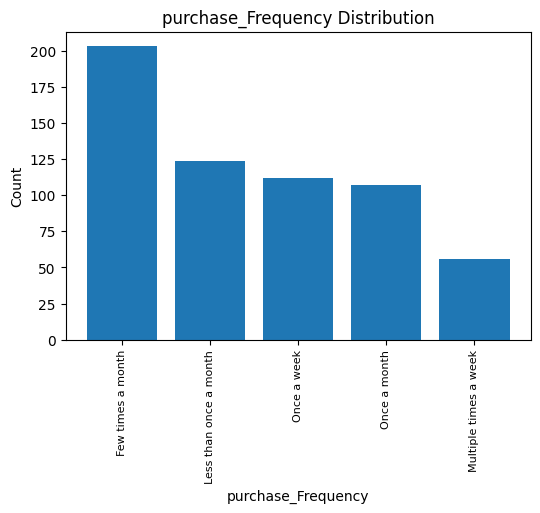

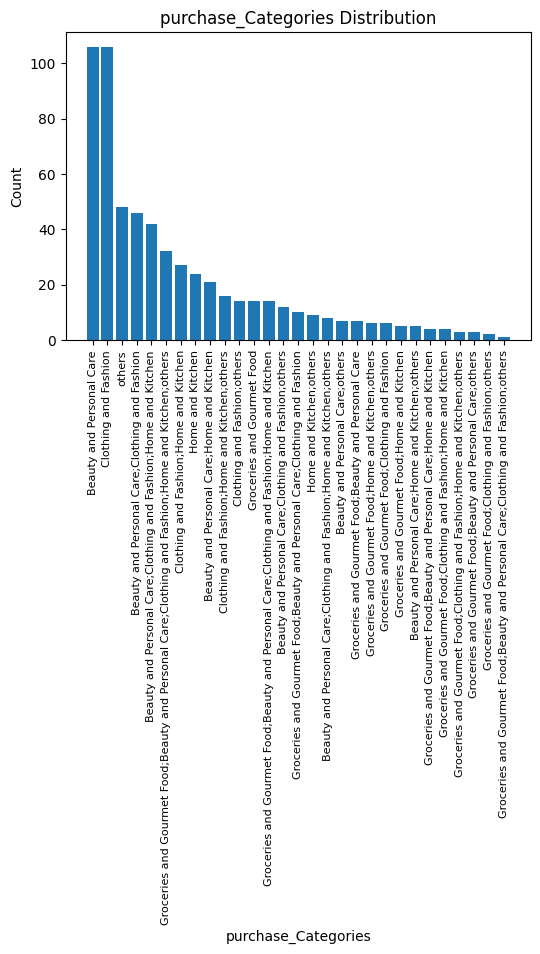

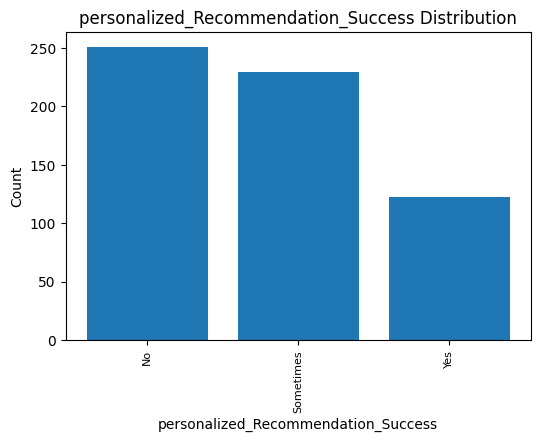

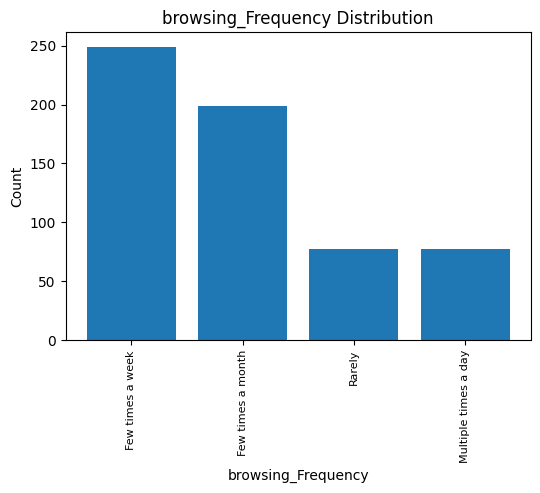

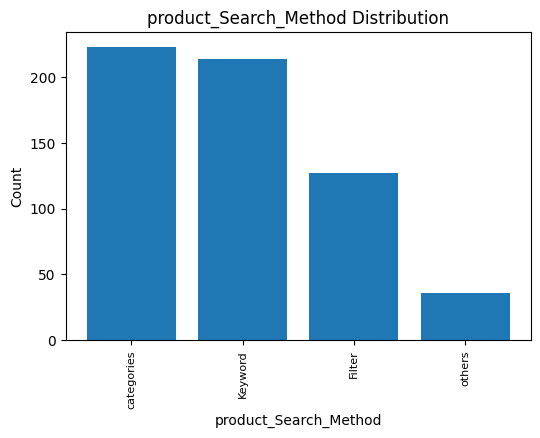

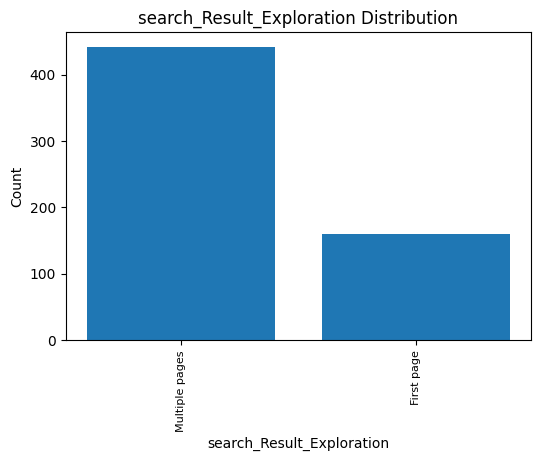

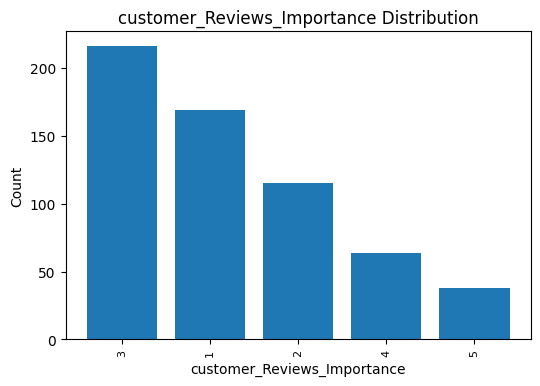

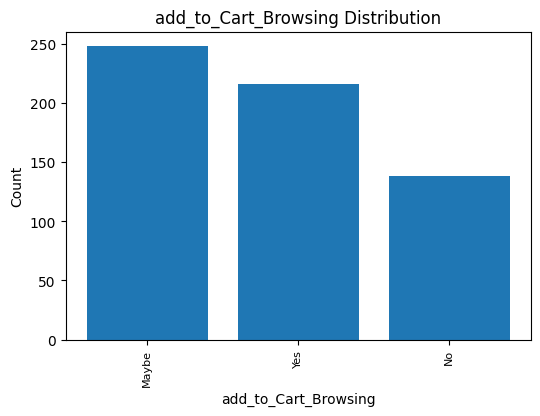

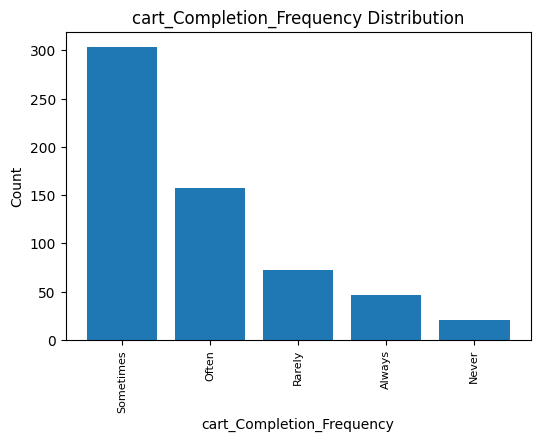

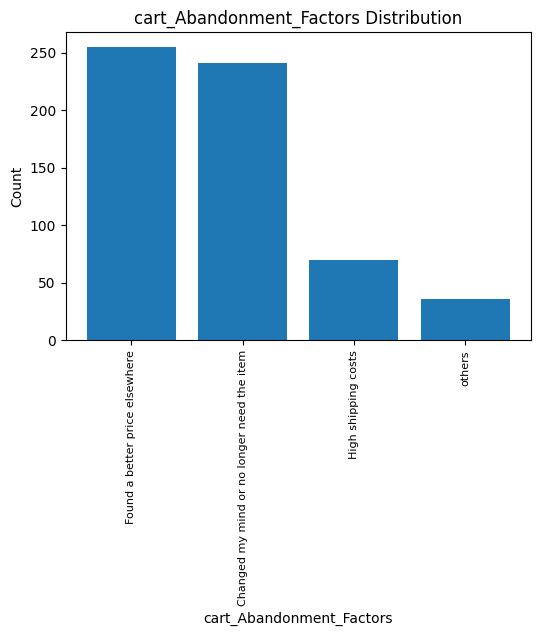

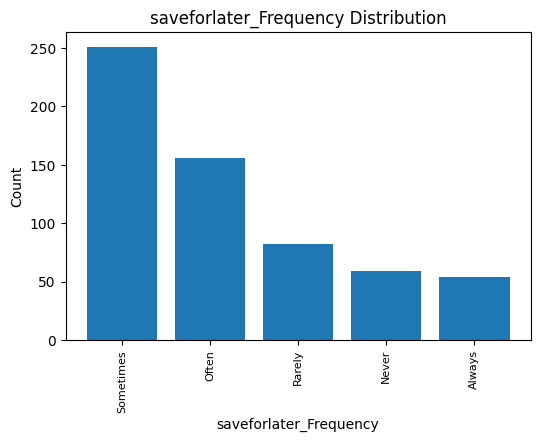

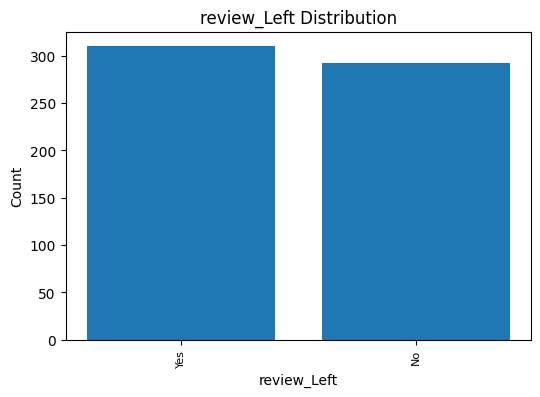

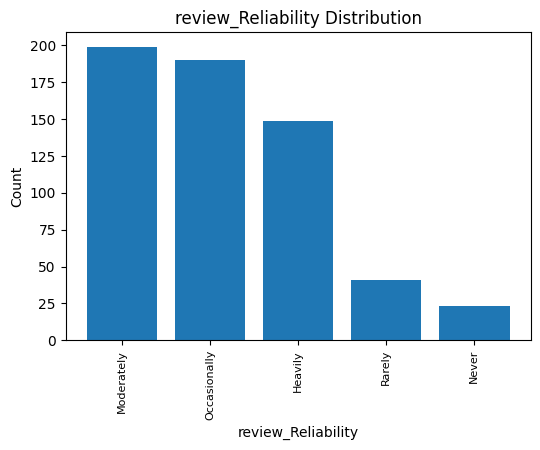

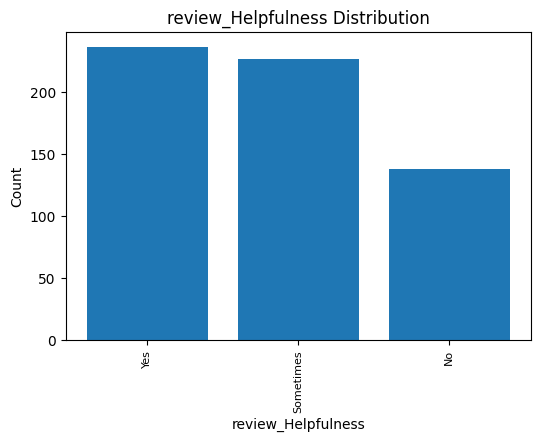

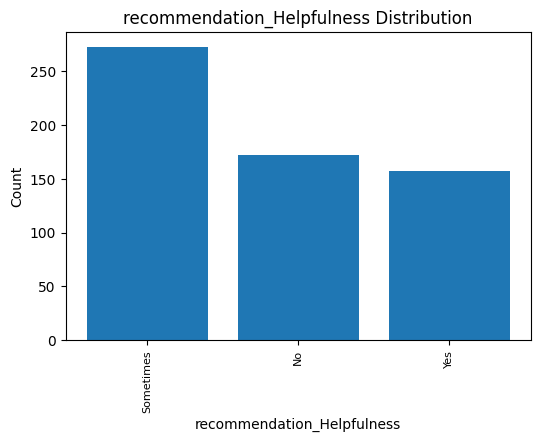

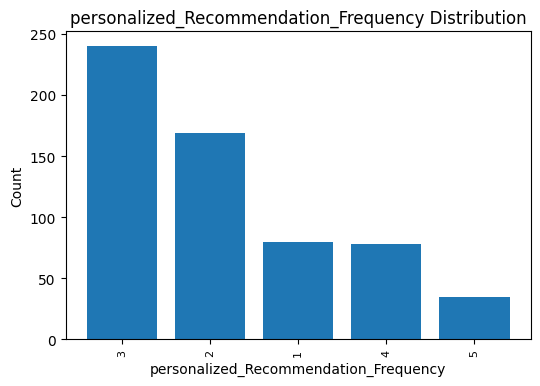

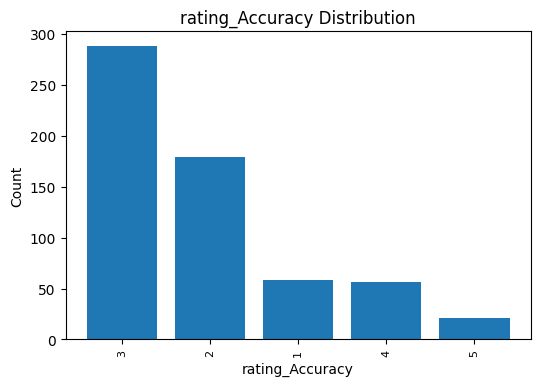

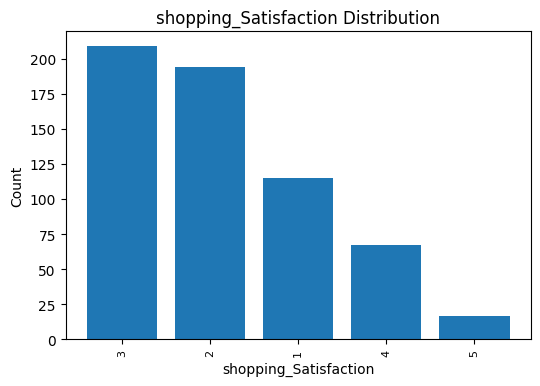

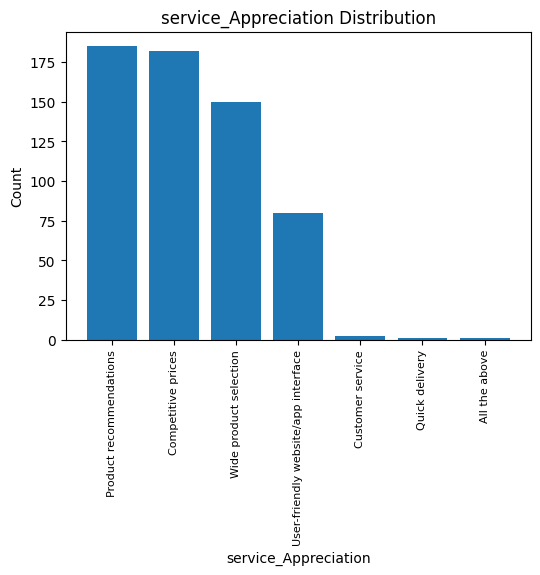

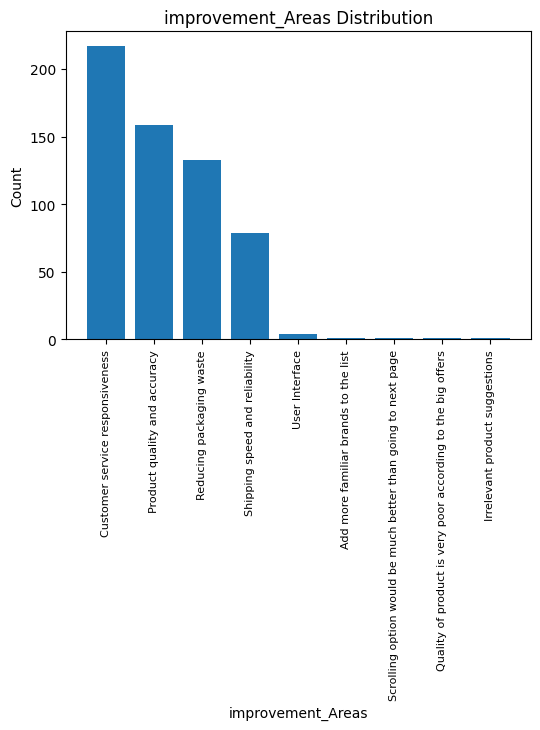

In [11]:
# visualise categorical variables in user_behaviour

def plot_one_by_one(df, categories):
    for category in categories:
        cat_count = df[category].value_counts()
        plt.figure(figsize=(6, 4))
        plt.bar(cat_count.index, cat_count.values)
        plt.title(f'{category} Distribution')
        plt.xlabel(category)
        plt.ylabel('Count')
        plt.xticks(rotation=90, fontsize=8)  # Rotate for readability
        
        # Show the plot for each category, then wait for user input before moving to the next one
        plt.show()
        input(f"Press Enter to view the next plot for '{category}'...")

plot_one_by_one(user_behaviour, user_behaviour_categoricals)


In [12]:
new_users = users.copy()

# Regroup users based on age range which are more relevant to the business context
bins = [0, 19, 24, 55, 100]
labels = ['Teenager', 'Young Adult', 'Adult', 'Senior']
new_users['age_group'] = pd.cut(new_users['age'], bins=bins, labels=labels)

new_users['age_group'].value_counts()
new_users

,user_id,age,gender,age_group
0,1,23,Female,Young Adult
1,2,23,Female,Young Adult
2,3,24,Prefer not to say,Young Adult
3,4,24,Female,Young Adult
4,5,22,Female,Young Adult
...,...,...,...,...
597,598,23,Female,Young Adult
598,599,23,Female,Young Adult
599,600,23,Female,Young Adult
600,601,23,Female,Young Adult


In [13]:
# Join user_behaviour and users dataframe on user_id
new_user_behaviour = user_behaviour.copy()
new_user_behaviour = new_user_behaviour.merge(new_users[['user_id', 'age', 'gender', 'age_group']], on='user_id', how='left')
new_user_behaviour

,user_id,timestamp,purchase_Frequency,purchase_Categories,personalized_Recommendation_Success,browsing_Frequency,product_Search_Method,search_Result_Exploration,customer_Reviews_Importance,add_to_Cart_Browsing,...,review_Helpfulness,recommendation_Helpfulness,personalized_Recommendation_Frequency,rating_Accuracy,shopping_Satisfaction,service_Appreciation,improvement_Areas,age,gender,age_group
0,1,2023-06-04 13:28:19,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Yes,Yes,2,1,1,Competitive prices,Reducing packaging waste,23,Female,Young Adult
1,2,2023-06-04 14:30:44,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Yes,Sometimes,2,3,2,Wide product selection,Reducing packaging waste,23,Female,Young Adult
2,3,2023-06-04 17:04:56,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,No,No,4,3,3,Competitive prices,Product quality and accuracy,24,Prefer not to say,Young Adult
3,4,2023-06-04 17:13:00,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Yes,Sometimes,3,3,4,Competitive prices,Product quality and accuracy,24,Female,Young Adult
4,5,2023-06-04 17:28:06,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Yes,Yes,4,2,2,Competitive prices,Product quality and accuracy,22,Female,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2023-06-12 16:02:02,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Sometimes,3,3,4,Competitive prices,Customer service responsiveness,23,Female,Young Adult
598,599,2023-06-12 16:02:53,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Sometimes,3,3,3,Product recommendations,Reducing packaging waste,23,Female,Young Adult
599,600,2023-06-12 16:03:59,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Sometimes,3,2,3,Wide product selection,Product quality and accuracy,23,Female,Young Adult
600,601,2023-06-12 21:57:20,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Yes,Yes,2,2,2,Wide product selection,Product quality and accuracy,23,Female,Young Adult


In [14]:
# drop user with age 3
new_user_behaviour['age'] = new_user_behaviour['age'].astype(int)
new_user_behaviour = new_user_behaviour[users['age'] != 3.0]
new_user_behaviour['age'].value_counts()

age
23    123
34     48
24     40
25     36
45     34
21     30
26     27
32     19
27     17
22     17
36     16
35     15
37     14
40     12
46     12
29      9
31      9
28      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
42      4
19      4
17      4
39      4
60      3
48      3
67      2
15      2
57      2
53      2
62      1
64      1
49      1
63      1
58      1
52      1
55      1
12      1
Name: count, dtype: int64

In [15]:
# Reduce number of categories in purchase_Categories

new_user_behaviour['purchase_Categories'] = new_user_behaviour['purchase_Categories'].apply(lambda x: x.split(";")[0] if ";" in x else x)
new_user_behaviour['purchase_Categories'].value_counts()

/var/folders/gd/v8v96pt94wl6b52w5qldf23m0000gn/T/ipykernel_1371/430396605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_user_behaviour['purchase_Categories'] = new_user_behaviour['purchase_Categories'].apply(lambda x: x.split(";")[0] if ";" in x else x)


purchase_Categories
Beauty and Personal Care      247
Clothing and Fashion          163
Groceries and Gourmet Food    111
others                         48
Home and Kitchen               32
Name: count, dtype: int64

In [16]:
# Reduce number of categories in improvement_Areas
new_user_behaviour['improvement_Areas'] = new_user_behaviour['improvement_Areas'].replace({
    "Add more familiar brands to the list": "Others",
    "Scrolling option would be much better than going to next page" : "User Interface",
    "Quality of product is very poor according to the big offers" : "Product quality and accuracy",
    "Irrelevant product suggestions" : "Others"
})
new_user_behaviour['improvement_Areas'].value_counts()

/var/folders/gd/v8v96pt94wl6b52w5qldf23m0000gn/T/ipykernel_1371/2807220974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_user_behaviour['improvement_Areas'] = new_user_behaviour['improvement_Areas'].replace({


improvement_Areas
Customer service responsiveness    216
Product quality and accuracy       160
Reducing packaging waste           133
Shipping speed and reliability      79
User Interface                       5
Others                               2
Name: count, dtype: int64

In [17]:
# Implement label encoding for categorical variables in user_behaviour
le=LabelEncoder()

encoded_user_behaviour = new_user_behaviour.copy()
for i in encoded_user_behaviour.columns:
  encoded_user_behaviour[i]=le.fit_transform(encoded_user_behaviour[i])

user_behaviour_corr = encoded_user_behaviour.drop(['user_id', 'timestamp', "age"], axis= 1)

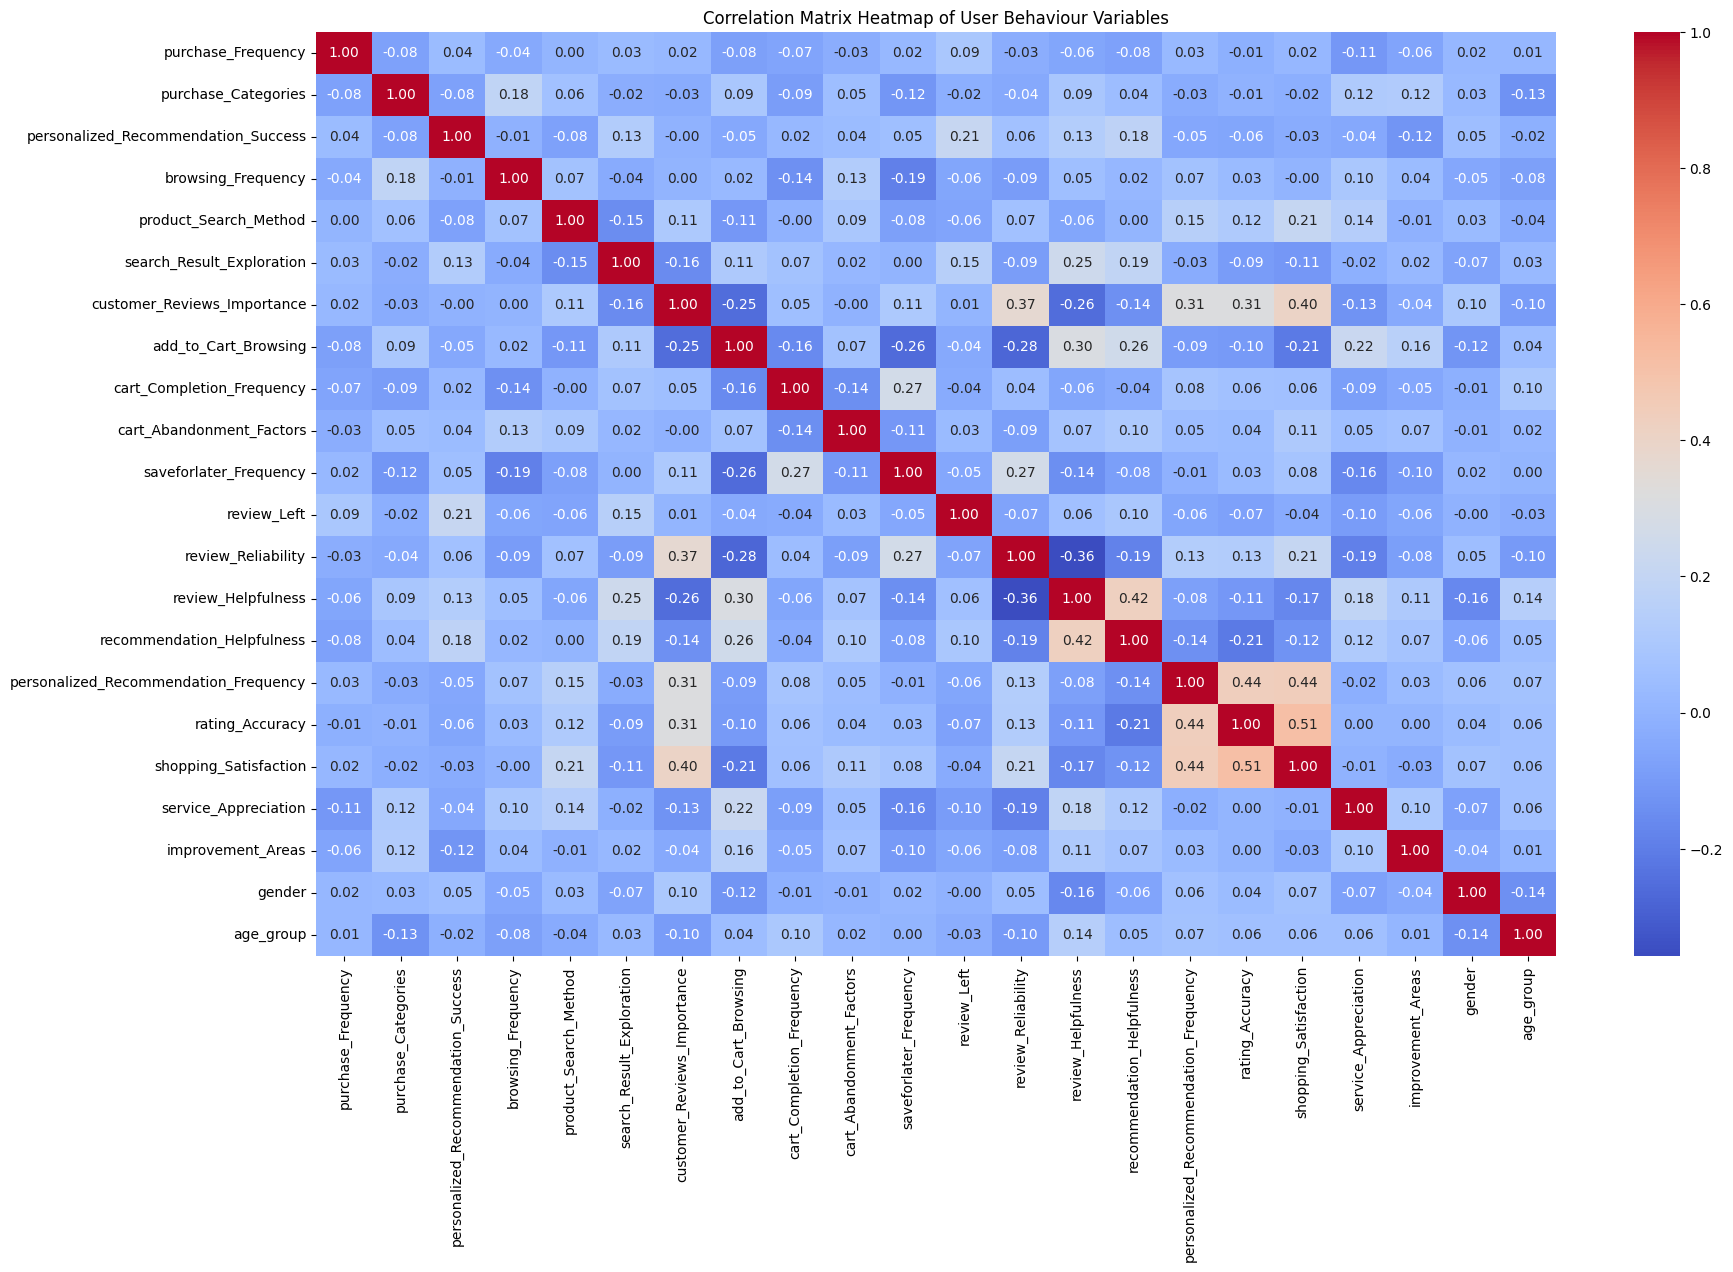

In [18]:
correlation_matrix = user_behaviour_corr.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap of User Behaviour Variables")
plt.show()

None of the features are strongly correlated to each other.

In [19]:
new_user_behaviour

,user_id,timestamp,purchase_Frequency,purchase_Categories,personalized_Recommendation_Success,browsing_Frequency,product_Search_Method,search_Result_Exploration,customer_Reviews_Importance,add_to_Cart_Browsing,...,review_Helpfulness,recommendation_Helpfulness,personalized_Recommendation_Frequency,rating_Accuracy,shopping_Satisfaction,service_Appreciation,improvement_Areas,age,gender,age_group
0,1,2023-06-04 13:28:19,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Yes,Yes,2,1,1,Competitive prices,Reducing packaging waste,23,Female,Young Adult
1,2,2023-06-04 14:30:44,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Yes,Sometimes,2,3,2,Wide product selection,Reducing packaging waste,23,Female,Young Adult
2,3,2023-06-04 17:04:56,Few times a month,Groceries and Gourmet Food,No,Few times a month,Keyword,Multiple pages,2,Yes,...,No,No,4,3,3,Competitive prices,Product quality and accuracy,24,Prefer not to say,Young Adult
3,4,2023-06-04 17:13:00,Once a month,Beauty and Personal Care,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Yes,Sometimes,3,3,4,Competitive prices,Product quality and accuracy,24,Female,Young Adult
4,5,2023-06-04 17:28:06,Less than once a month,Beauty and Personal Care,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Yes,Yes,4,2,2,Competitive prices,Product quality and accuracy,22,Female,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2023-06-12 16:02:02,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Sometimes,3,3,4,Competitive prices,Customer service responsiveness,23,Female,Young Adult
598,599,2023-06-12 16:02:53,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Sometimes,3,3,3,Product recommendations,Reducing packaging waste,23,Female,Young Adult
599,600,2023-06-12 16:03:59,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Sometimes,3,2,3,Wide product selection,Product quality and accuracy,23,Female,Young Adult
600,601,2023-06-12 21:57:20,Few times a month,Beauty and Personal Care,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Yes,Yes,2,2,2,Wide product selection,Product quality and accuracy,23,Female,Young Adult


In [20]:
data = new_user_behaviour[['age_group', 'gender', 'purchase_Frequency']]

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Add the cluster column to the DataFrame
data['Cluster'] = clusters
data.groupby('Cluster').size()
# Show results
print(km.cluster_centroids_)
print(km.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 181, cost: 568.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 48, cost: 724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 107, cost: 636.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 595.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 87, cost: 587.0
Run 5, iteration: 2/100, moves: 74, cost: 587.0
Best run was number 1
[['Adult' 'Male' 'Few times a month']
 ['Young Adult' 'Female' 'Less than once a month']
 ['Adult' 'Female' 'Few times a month']]
568.0


/var/folders/gd/v8v96pt94wl6b52w5qldf23m0000gn/T/ipykernel_1371/644026102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


<Axes: xlabel='age_group', ylabel='purchase_Frequency'>

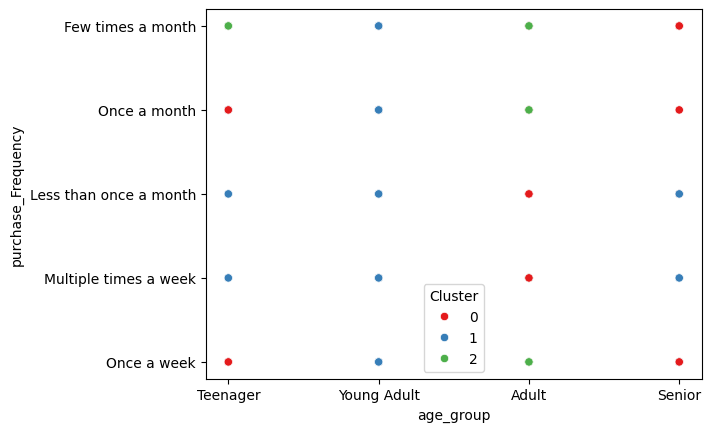

In [21]:
sns.scatterplot(data=data, x='age_group', y='purchase_Frequency', hue='Cluster', palette='Set1')